In [130]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

The excel file `data.xls` contains data for a series on experiments on cell migration and proliferation. Use what you have learned during the course to analyze the dataset. Show which treatments in which cell line have an effect on cell migratoin and/or proliferation. Collect your findings in a well organized jupyer notebook, which is the final product of this case study. The notebook should contain:
* different kinds of plots, for example scatter plots, strip or swarm plots, histograms, and boxplots;
* multiple plots in one figure using subplots
* a written discussion of the plots; just code and figures is not enough

Make sure that your plots contain error bars wherever that is applicable and plots are fully anotated (e.g. titles, axes labels, legends). 

Hints:
* **Google is your friend**
* Load the data from `data.xls` using `df = pd.read_excel('data.xls')`. 
* [Markdown syntax](https://daringfireball.net/projects/markdown/syntax)
* [Jupyter notebook cheat sheet](http://datacamp-community.s3.amazonaws.com/48093c40-5303-45f4-bbf9-0c96c0133c40)
* [Pandas cheat sheet](http://datacamp-community.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8)
* [Matplotlib plotting examples](https://matplotlib.org/gallery.html)
* [Matplotlib cheat sheet](http://datacamp-community.s3.amazonaws.com/28b8210c-60cc-4f13-b0b4-5b4f2ad4790b)
* [Seaborn plotting examples](https://seaborn.pydata.org/examples/index.html)
* [Seaborn cheat sheet](http://datacamp-community.s3.amazonaws.com/f9f06e72-519a-4722-9912-b5de742dbac4)
* If you feel up to it, have a look at running statistical tests: https://www.scipy-lectures.org/packages/statistics/index.html.


## Import Data and Inspect Data

In [131]:
df = pd.read_excel('data.xls')

In [132]:
df.describe()

,cell count,migration score,biological replicate,technical replicate
count,315.000000,315.000000,315.000000,315.000000
mean,98029.471710,1.522320,2.000000,2.000000
std,111412.765609,1.833875,0.817796,0.817796
min,-25652.958231,-0.447149,1.000000,1.000000
25%,42858.984183,0.568913,1.000000,1.000000
50%,72331.955007,1.001566,2.000000,2.000000
75%,90270.495558,1.787471,3.000000,3.000000
max,649911.199232,11.346342,3.000000,3.000000


## Group dataframe by same conditions to isolate the technical replicates

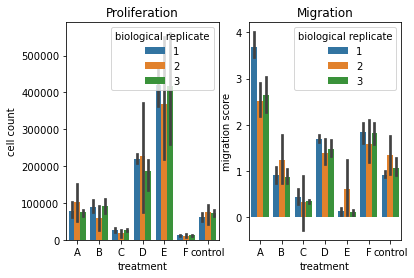

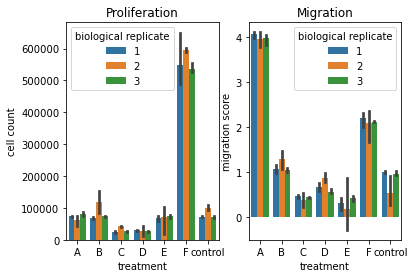

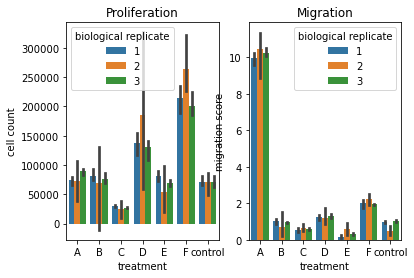

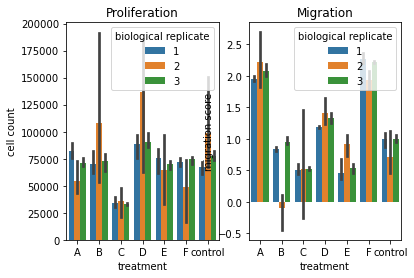

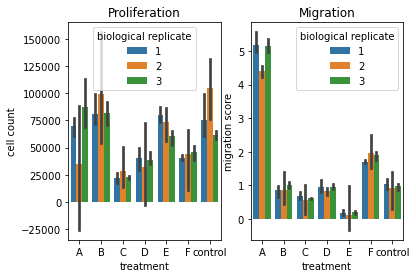

In [133]:
for i in df['line'].unique():
    fig, ax = plt.subplots(1,2)
    sns.barplot(data=df[df['line']==i], y='cell count', x='treatment', hue='biological replicate', ax=ax[0])
    sns.barplot(data=df[df['line']==i], y='migration score', x='treatment', hue='biological replicate', ax=ax[1])
    ax[0].set_title('Proliferation')
    ax[1].set_title('Migration')
    plt.show()

There seem to be quite some technical errors, especially in the proliferation data. However, since I am not sure of how the data was gathered and I have not been given a logbook I do not know if these points are definite outliers. It won't pose a problem since most of the means of technical replicates tend to be similar across the biological replicates.

## Averaging the biological replicates

<AxesSubplot:xlabel='line', ylabel='cell count'>

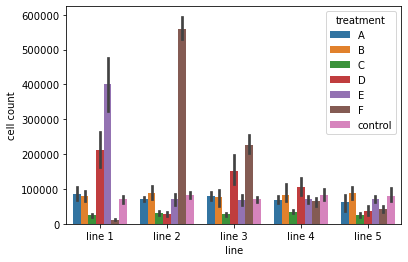

In [134]:
sns.barplot(data=df, x='line', y='cell count', hue='treatment')

<AxesSubplot:xlabel='line', ylabel='migration score'>

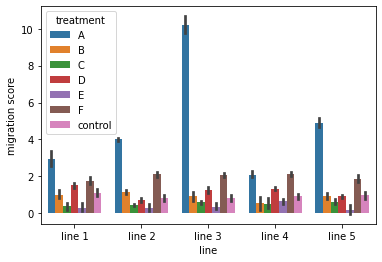

In [135]:
sns.barplot(data=df, x='line', y='migration score', hue='treatment')

## Normalizing data
The axis do have quite large values, it would be nice if we could normalize to a control of 0 of a reference cell line. We'll choose cell line 1 to be the reference of all cell lines.

In [136]:
Control_value = df[(df['line']=='line 1') & (df['treatment']=='control')].mean()

/tmp/ipykernel_2294/1213248773.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Control_value = df[(df['line']=='line 1') & (df['treatment']=='control')].mean()


In [137]:
df['cell count'] = df['cell count']/Control_value['cell count']-1
df['migration score'] = df['migration score']/Control_value['migration score']-1

Text(0.5, 1.0, 'Proliferation')

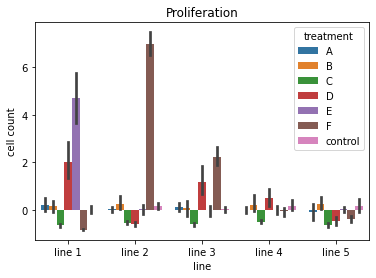

In [148]:
sns.barplot(data=df, x='line', y='cell count', hue='treatment')
plt.title("Proliferation")

Text(0.5, 1.0, 'Migration')

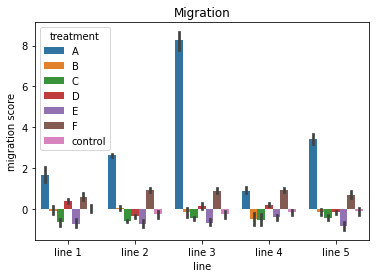

In [149]:
sns.barplot(data=df, x='line', y='migration score', hue='treatment')
plt.title("Migration")

These plots only show what treatments do on one of the properties of the cell. However, it would also be nice to show treatments having a correlated effect, e.g. both decrease/increase migration and proliferation

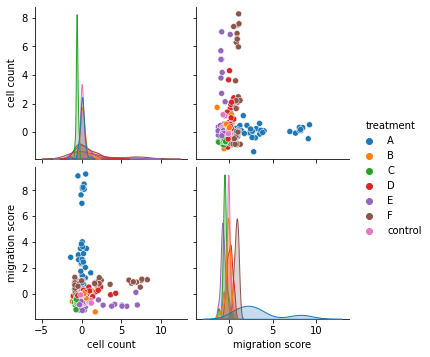

In [151]:
pair_df = df[['cell count', 'migration score', 'treatment', 'line']]
sns.pairplot(pair_df, hue='treatment')

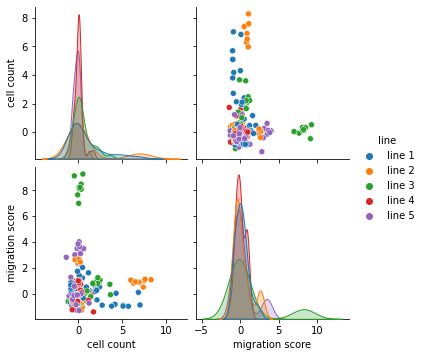

In [152]:
sns.pairplot(pair_df, hue='line')

There seems to be little correlation between migration and proliferation

## Conclusion
We can conclude that treatment A increases migration quite more than other treatments in almost every cell line of which line 3 is affected the most. For the treatments that increase proliferation (D, E and F) they do it in a cell line-specific manner, sometimes increasing proliferation while sometimes decreasing it. Treatment C seems to have a similar decrease in proliferation across all cell types and also decreaeses the migration score in a similar manner across cell lines. This treatment C would be a promising therapeutic for the inhibition of proliferation and migration. However, it does decrease both properties ever so slightly, so optimilization of the treatment should be performed.